# <center> IESO ML Project </center>

<center> notebook six <br> Random Forests, <br> Upsampling and<br> HyperParameter Optimization</center>

Prepared by Behrouz ShakeriFard <br>

email: bshakeri@torontomu.ca <br>
April 2024

<hr>

In the previous notebook we explored potentials offered by Decision Trees Machine Learning model. After upsampling we improved the RECALL score from 0.35 to 0.69. We hope to achieve a higher score with random forests. Let's get started!

In [1]:
# importing a few useful packages
import numpy as np
import pandas as pd


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import style

In [3]:
from sklearn.model_selection import train_test_split
# importing the random Forest package
from sklearn.ensemble import RandomForestClassifier

In [15]:
# importing useful packages
from sklearn.metrics import confusion_matrix, classification_report

In [4]:
# Let's import our data
df = pd.read_csv('df_ieso_cleaned_2021.csv')
new_features_df = pd.read_csv('New Features IESO ML 2024.csv')

# Some clean-up 
df.drop('Unnamed: 0', inplace=True, axis=1)

df.index = pd.to_datetime(df['Date Time'])
df.drop('Date Time', inplace=True, axis=1)
new_features_df.drop('Unnamed: 0', axis=1, inplace=True)

## Target

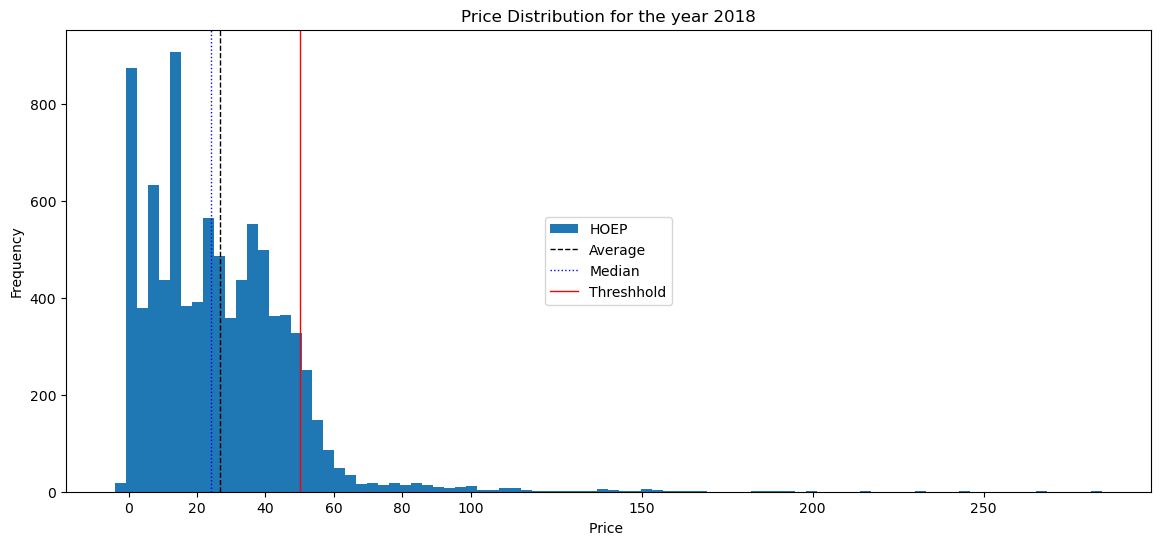

In [5]:
# initiate the plot and setting the size
plt.figure(figsize=(14,6))

# filtering values and selecting the column for our histogram
filtered_price = df[df['HOEP'] <= 300]['HOEP']
filtered_price.plot(kind='hist',bins=90)

# mean or average of the distribution
plt.axvline(df['HOEP'].mean(), color='k', linestyle='dashed', linewidth=1, label='Average')

# median of the distribution
plt.axvline(df['HOEP'].median(), color='b', linestyle=':', linewidth=1, label='Median')

# a hypothetical threshhold
plt.axvline(50, color='r', linestyle='solid', linewidth=1, label='Threshhold')

plt.xlabel('Price ')
plt.ylabel('Frequency')
plt.xticks([0,20,40,60,80,100,150,200,250])

# Title of our graph
plt.title('Price Distribution for the year 2018')
plt.legend(loc='center')
plt.show()

In [6]:
# new dataframe
df_target=pd.DataFrame()

# importing price
df_target['Price'] = df['HOEP']

# connect column represents a True or False (binary) variable
df_target['peak'] = df_target.apply(lambda x: int(0) if int(x['Price']) < 50 else int(1), axis=1)

In [7]:
features_df = pd.DataFrame()

# selecting the best three features
features_df = new_features_df[['2021 Demand','Market Surplus','Output/Cap']]

In [8]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(features_df, df_target['peak'], test_size=0.3, random_state=1)

# Random Forest

In [9]:
# making sure we have data stored in X_test and X_train variables
print(f'Shape of test set: {X_test.shape}')
print(f'Shape of train set: {X_train.shape}')

Shape of test set: (2628, 3)
Shape of train set: (6132, 3)


In [10]:
# initiating the model
my_random_forest = RandomForestClassifier()
my_random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [41]:
# Trying different forests

random_forest_scores = []
for sub_tree in my_random_forest.estimators_:
    decision_tree_scores.append(sub_tree.score(X_train, y_train))
    


/home/behroox/anaconda3/envs/ML_experiment/lib/python3.8/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/home/behroox/anaconda3/envs/ML_experiment/lib/python3.8/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/home/behroox/anaconda3/envs/ML_experiment/lib/python3.8/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/home/behroox/anaconda3/envs/ML_experiment/lib/python3.8/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/home/behroox/anaconda3/envs/ML_experiment/lib/python3.8/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  

In [12]:
print(f"The TRAIN classification accuracy is:  {my_random_forest.score(X_train,y_train)}")
print(f"The TEST classification accuracy is:  {my_random_forest.score(X_test,y_test)}")

The TRAIN classification accuracy is:  1.0
The TEST classification accuracy is:  0.9288432267884322


In [42]:
# Get class predictions
y_pred = my_random_forest.predict(X_test)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# label rows and columns
cf_df = pd.DataFrame(
    cf_matrix, 
    columns=["Predicted Non-peak", "Predicted Peak"],
    index=["True Non-Peak", "True Peak Price"]
)

display(cf_df)

/home/behroox/anaconda3/envs/ML_experiment/lib/python3.8/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


,Predicted Non-peak,Predicted Peak
True Non-Peak,2333,57
True Peak Price,130,108


In [16]:
print(classification_report(y_test, my_random_forest.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      2390
           1       0.65      0.45      0.54       238

    accuracy                           0.93      2628
   macro avg       0.80      0.71      0.75      2628
weighted avg       0.92      0.93      0.92      2628



### HyperParameter optimization

In [20]:
n_estimater_range = range(1,45)


results = []

for n_est in n_estimater_range:
    my_rf = RandomForestClassifier(n_estimators=n_est)
    my_rf.fit(X_train,y_train)
    
    train_score = my_rf.score(X_train,y_train)
    test_score = my_rf.score(X_test,y_test)
    
    results.append({'n_estimater':n_est,
                                 'Train':train_score,
                                 'Test': test_score
                             })
results_df = pd.concat([pd.DataFrame(result, index=[0]) for result in results], ignore_index=True)

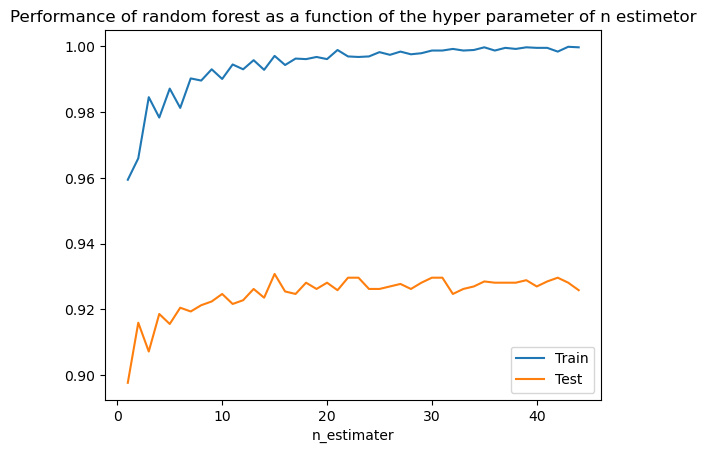

In [21]:
# initiating the plot
plt.figure()
results_df.plot(x='n_estimater',y=['Train','Test'],ax = plt.gca())
plt.title('Performance of random forest as a function of the hyper parameter of n estimetor')
plt.show()

It is not clear whether going beyond n = 30 would provide any significant improvement in our model's predictive capability. <br>

We will do upsampling now, before we do a comparison between the models.

In [22]:
# upsample the credit card example
from sklearn.utils import resample

In [23]:
df_target.reset_index(inplace=True)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(features_df, df_target['peak'], test_size = 0.3, random_state=1)

# Upsample
print('Number of class 1 examples before resampling:', X_train[y_train == 1].shape[0])

Number of class 1 examples before resampling: 600


In [25]:
X_upsampled, y_upsampled = resample(X_train[y_train == 1], 
                                    y_train[y_train == 1], 
                                    replace=True, 
                                    # this line aims to truly balance the classes, by getting the number of class 0
                                    # and repeating the resampling process until class 1 counts gets on par with class 0
                                    n_samples=X_train[y_train == 0].shape[0], 
                                    random_state=123)

print('Number of class 1 examples after:', X_upsampled.shape[0])

# Combine upsample with original data
X_train_bal = np.vstack((X_train[y_train == 0], X_upsampled))
y_train_bal = np.hstack((y_train[y_train == 0], y_upsampled))

Number of class 1 examples after: 5532


In [26]:
X_test = X_test.values

In [37]:
#Fit to the training data

RF_balanced = RandomForestClassifier(n_estimators=30)
RF_balanced.fit(X_train_bal, y_train_bal)

# evaluate on the original test set - NO UPSAMPLING
y_pred_bal = RF_balanced.predict(X_test) 

In [35]:
print(f"The TRAIN classification accuracy is:  {RF_balanced.score(X_train_bal,y_train_bal)}")
print(f"The TEST classification accuracy is:  {RF_balanced.score(X_test,y_test)}")

The TRAIN classification accuracy is:  0.9991865509761388
The TEST classification accuracy is:  0.9155251141552512


In [38]:
# Get class predictions
y_pred = RF_balanced.predict(X_test)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# label rows and columns
cf_df = pd.DataFrame(
    cf_matrix, 
    columns=["Predicted Non-peak", "Predicted Peak"],
    index=["True Non-Peak", "True Peak Price"]
)

display(cf_df)

,Predicted Non-peak,Predicted Peak
True Non-Peak,2286,104
True Peak Price,108,130


In [39]:
print(classification_report(y_test, RF_balanced.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      2390
           1       0.56      0.55      0.55       238

    accuracy                           0.92      2628
   macro avg       0.76      0.75      0.75      2628
weighted avg       0.92      0.92      0.92      2628



<hr>
Reminder:

$$Recall = \frac{TP}{TP+FN}$$

<hr>

Cool. The combination of hyper-parameter optimization and upsampling the data, has improved the performance of our model. Let's do a quick comparison.

In [43]:
# RECALL score, before upsampling
108/(130+108)

0.453781512605042

In [44]:
# RECALL score, after upsampling
130/(108+130)

0.5462184873949579

This is not bad; but it is a bit surprising. Because Decision Tree (previous notebook) managed to score 69%.

<hr>

This is the end of Random Forest notebook. Next, we will try Support Vector Machine, and XGB